# Imports

In [1]:
import scraper
import src.acquire
import prepare_r

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from requests import get
from bs4 import BeautifulSoup as BS

import re
import nltk

# Acquire

In [2]:
df = pd.read_json('data.json')

In [3]:
print(df.shape)
df.head()

(280, 3)


,repo,language,readme_contents
0,jtleek/datasharing,None,How to share data with a statistician\n=======...
1,rdpeng/ProgrammingAssignment2,R,### Introduction\n\nThis second programming as...
2,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...
3,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www...."
4,SmartThingsCommunity/SmartThingsPublic,Groovy,# SmartThings Public GitHub Repo\n\nAn officia...


# Prepare

In [4]:
df = prepare_r.prep_contents(df)

In [5]:
df.language.value_counts()

JavaScript          58
Java                33
Python              31
C++                 16
HTML                12
Jupyter Notebook    12
Go                  11
PHP                 11
TypeScript          10
Ruby                 9
CSS                  8
C                    8
Shell                5
Vue                  3
R                    2
TeX                  2
C#                   2
Kotlin               2
Rust                 2
PowerShell           2
Scala                1
Objective-C          1
Swift                1
Dart                 1
Groovy               1
ApacheConf           1
Name: language, dtype: int64

In [6]:
df['language'] = df.language.replace(['PHP','Shell','Kotlin','Vue','ApacheConf','Jupyter Notebook','R','Groovy',
                                      'Scala','Rust','C#','Dart','Ruby', 'TeX', 'PowerShell', 'Objective-C', 'Swift'], 'Other')

In [7]:
df = df[df.language != 'Other']

In [8]:
df.language.value_counts()

JavaScript    58
Java          33
Python        31
C++           16
HTML          12
Go            11
TypeScript    10
C              8
CSS            8
Name: language, dtype: int64

## Handling Null Values

In [9]:
df.shape

(222, 8)

In [10]:
df.dropna(inplace=True)

In [11]:
df.reset_index(inplace=True)

In [12]:
df.head()

,index,repo,language,readme_contents,original,normalized,stemmed,lemmatized,cleaned
0,2,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...,### Well hello there!\n\nThis repository is me...,well hello there this repository meant pro...,well hello there thi repositori meant provid e...,well hello there this repository meant provide...,well hello repository meant provide example fo...
1,3,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www....","<div align=""center"">\n <img src=""https://www....",div align center img src https www te...,div align center img src http www tensorflow o...,div align center img src http www tensorflow o...,div align center img src tensorflow org image ...
2,5,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...","<p align=""center"">\n <a href=""https://getboot...",align center href https getbootstrap...,align center href http getbootstrap com img sr...,align center href http getbootstrap com img sr...,align center href getbootstrap com img src get...
3,8,tensorflow/models,Python,![Logo](https://storage.googleapis.com/model_g...,![Logo](https://storage.googleapis.com/model_g...,logo https storage googleapis com model gar...,logo http storag googleapi com model garden ar...,logo http storage googleapis com model garden ...,logo storage googleapis com model garden artif...
4,9,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...,Nightscout Web Monitor (a.k.a. cgm-remote-moni...,nightscout web monitor cgm remote monitor...,nightscout web monitor cgm remot monitor night...,nightscout web monitor cgm remote monitor nigh...,nightscout web monitor cgm remote monitor nigh...


# Feature Engineering

## Word Count

In [13]:
df['readme_words'] = df['cleaned'].apply(lambda x: len(x.split()))

## Sentence Count

In [14]:
df['sentence_count'] = df['readme_contents'].apply(lambda x: len(x.split('\n\n')))

## Bracket Count

In [15]:
df['bracket_count'] = df['readme_contents'].apply(lambda x: x.count('['))

## Angle Bracket Count

In [16]:
df['angle_bracket_count'] = df['readme_contents'].apply(lambda x: x.count('<'))

## Sentiment Analysis

In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [18]:
sia = SentimentIntensityAnalyzer()

In [19]:
df['sentiment'] = df.cleaned.apply(lambda msg: sia.polarity_scores(msg)['compound'])

# Explore

Text(0.5, 1.0, 'Number of Repos by Language')

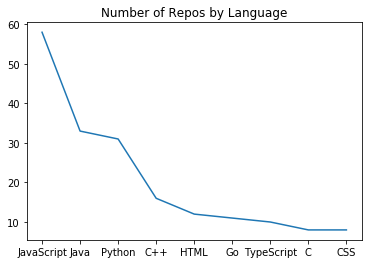

In [126]:
df.language.value_counts().plot()
plt.title('Number of Repos by Language')

In [20]:
df.groupby(['language']).bracket_count.median()

language
C             15.0
C++           58.5
CSS           19.5
Go            35.0
HTML           6.0
Java          27.0
JavaScript    33.5
Python        40.0
TypeScript    38.0
Name: bracket_count, dtype: float64

In [21]:
df.groupby(['language']).angle_bracket_count.median()

language
C             0.5
C++           3.0
CSS           2.5
Go            1.0
HTML          0.0
Java          1.0
JavaScript    6.0
Python        3.0
TypeScript    3.0
Name: angle_bracket_count, dtype: float64

# Stats Testing

# Modeling

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [23]:
tfidf  = TfidfVectorizer()
sparse = tfidf.fit_transform(df.cleaned)
data   = pd.DataFrame(sparse.todense(), columns=tfidf.get_feature_names())

In [24]:
data.head()

,aaaaaaaaaac,aaaaaaaaaai,aaaaaaaad,aaaaaaaaecm,aaaaaaaaerc,aaaaaaaaex,aac,aadc,aaef,aafb,...,zxingorg,zybpzd,zygmuntz,zymergen,zynga,zypper,zyszys,zzadeh,zzm,zzztimbo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
word_count          = df[['readme_words']]
sentence_count      = df[['sentence_count']]
bracket_count       = df[['bracket_count']]
angle_bracket_count = df[['angle_bracket_count']]
sentiment           = df[['sentiment']]

In [26]:
# features to test word_count, sentence_count, bracket_count, angle_bracket_count, sentiment

In [95]:
joined = pd.concat([data, word_count, sentence_count, bracket_count, angle_bracket_count, sentiment], axis=1)

In [112]:
joined.head()

,aaaaaaaaaac,aaaaaaaaaai,aaaaaaaad,aaaaaaaaecm,aaaaaaaaerc,aaaaaaaaex,aac,aadc,aaef,aafb,...,zymergen,zynga,zypper,zyszys,zzadeh,zzm,zzztimbo,bracket_count,angle_bracket_count,sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0.9485
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116,4,0.9890
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99,34,0.9958
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,3,0.9858
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,213,5,0.9998


In [97]:
X = joined
y = df.language

## Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

In [100]:
train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

In [101]:
lm = LogisticRegression().fit(X_train, y_train)

train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)

In [102]:
print('TRAIN ACCURACY SCORE')
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('TEST ACCURACY SCORE')
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))

TRAIN ACCURACY SCORE
Accuracy: 30.20%
---
TEST ACCURACY SCORE
Accuracy: 34.21%


## Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

In [105]:
train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

train['predicted'] = tree.predict(X_train)
test['predicted'] = tree.predict(X_test)

In [106]:
print('TRAIN ACCURACY SCORE')
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('TEST ACCURACY SCORE')
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))

TRAIN ACCURACY SCORE
Accuracy: 59.73%
---
TEST ACCURACY SCORE
Accuracy: 39.47%


## KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

In [109]:
train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

knn = KNeighborsClassifier(n_neighbors=22).fit(X_train, y_train)

train['predicted'] = knn.predict(X_train)
test['predicted'] = knn.predict(X_test)

In [110]:
for k in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    print(f'{k:2d}: {accuracy:.2%}')

 1: 21.05%
 2: 13.16%
 3: 13.16%
 4: 18.42%
 5: 34.21%
 6: 28.95%
 7: 23.68%
 8: 21.05%
 9: 23.68%
10: 23.68%
11: 26.32%
12: 23.68%
13: 26.32%
14: 26.32%
15: 23.68%
16: 23.68%
17: 26.32%
18: 28.95%
19: 26.32%
20: 26.32%
21: 26.32%
22: 26.32%
23: 23.68%
24: 23.68%
25: 23.68%


In [111]:
print('TRAIN ACCURACY SCORE')
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('TEST ACCURACY SCORE')
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))

TRAIN ACCURACY SCORE
Accuracy: 36.91%
---
TEST ACCURACY SCORE
Accuracy: 26.32%
